In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rentals = pd.read_csv('train.csv')

In [3]:
rentals.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 4:00:00,1,0,1,1,9.84,11.365,48.0,15.0013,0,2,2
96,2011-01-05 5:00:00,1,0,1,1,9.02,11.365,47.0,11.0014,0,3,3
97,2011-01-05 6:00:00,1,0,1,1,8.20,9.850,47.0,15.0013,0,33,33
98,2011-01-05 7:00:00,1,0,1,1,7.38,9.090,43.0,12.9980,1,87,88


## Insights of data

In [4]:
rentals.shape

(12980, 12)

In [5]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


## EDA

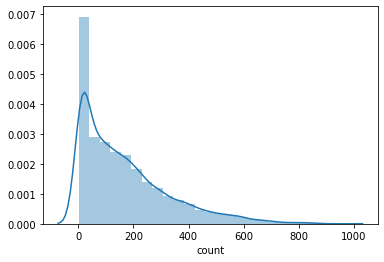

In [6]:
sns.distplot(rentals['count'], bins = 25)

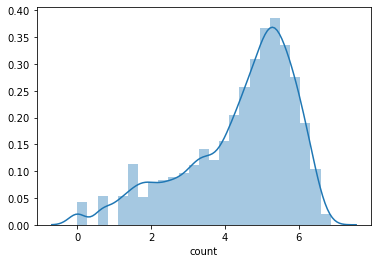

In [7]:
sns.distplot(np.log(rentals['count']), bins = 25)

In [8]:
numeric_features = rentals.select_dtypes(include=[np.number])

In [9]:
numeric_features

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12975,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48


In [10]:
corr =numeric_features.corr()

In [11]:
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,-0.010959,0.014343,-0.013005,0.394560,0.397765,0.181712,-0.135762,0.104657,0.085699,0.100687
holiday,-0.010959,1.000000,-0.248558,-0.018406,-0.025104,-0.032903,-0.029520,0.021646,0.029135,-0.046053,-0.029340
workingday,0.014343,-0.248558,1.000000,0.052788,0.060589,0.064840,0.028026,0.001986,-0.307930,0.131819,0.018842
weather,-0.013005,-0.018406,0.052788,1.000000,-0.093655,-0.094877,0.432497,0.011120,-0.161752,-0.139034,-0.161018
temp,0.394560,-0.025104,0.060589,-0.093655,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.397765,-0.032903,0.064840,-0.094877,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,0.181712,-0.029520,0.028026,0.432497,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.135762,0.021646,0.001986,0.011120,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.104657,0.029135,-0.307930,-0.161752,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.085699,-0.046053,0.131819,-0.139034,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329


In [12]:
corr_matrix = abs(corr)

In [13]:
print(corr_matrix["count"].sort_values(ascending=False).head(10))

count         1.000000
registered    0.968329
casual        0.707938
temp          0.415938
atemp         0.412644
humidity      0.322269
weather       0.161018
windspeed     0.105607
season        0.100687
holiday       0.029340
Name: count, dtype: float64


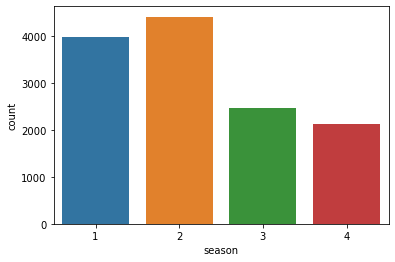

In [14]:
sns.countplot(rentals.season)

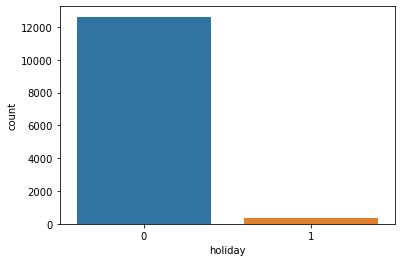

In [15]:
sns.countplot(rentals.holiday)

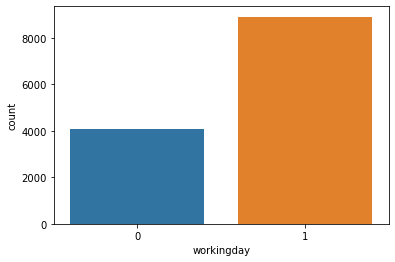

In [16]:
sns.countplot(rentals.workingday)

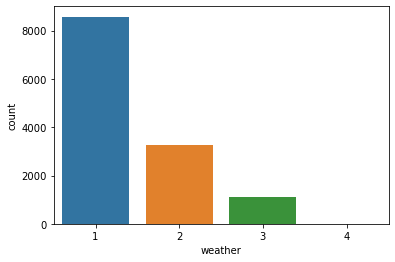

In [17]:
sns.countplot(rentals.weather)

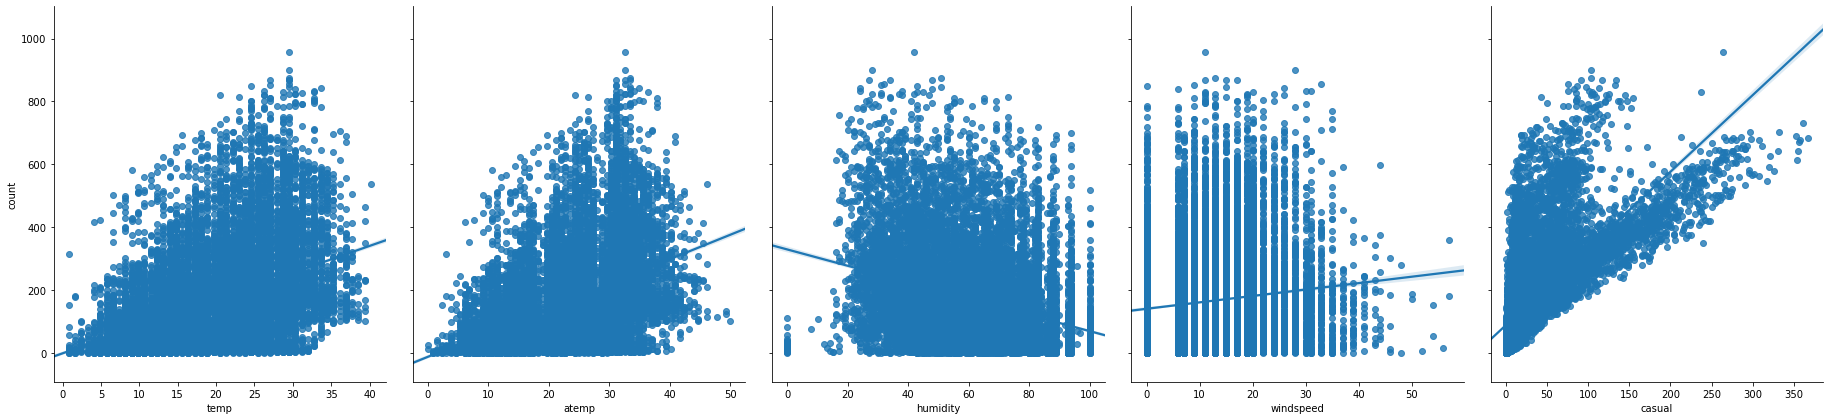

In [18]:
sns.pairplot(data=rentals, palette='icefire', x_vars=['temp','atemp','humidity','windspeed','casual'], y_vars=['count'], height=6, aspect=.85, kind='reg')

In [19]:
rentals.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [20]:
rentals['datetime'] = pd.to_datetime(rentals['datetime'],format= '%Y-%m-%d %H:%M:%S')

In [21]:
rentals.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [22]:
#rentals['year']=rentals['datetime'].dt.year 
rentals['month']=rentals['datetime'].dt.month 
#rentals['day']=rentals['datetime'].dt.day
rentals['Hour'] = rentals['datetime'].dt.hour 
#rentals['minute'] = rentals['datetime'].dt.minute 


In [23]:
rentals.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48.0,15.0013,0,2,2,1,4
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47.0,11.0014,0,3,3,1,5
97,2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47.0,15.0013,0,33,33,1,6
98,2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43.0,12.9980,1,87,88,1,7


In [24]:
rentals = rentals.drop('datetime',axis=1)

In [25]:
rentals = rentals.drop('atemp',axis=1)

In [26]:
rentals.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,Hour
0,1,0,0,1,9.84,81.0,0.0,3,13,16,1,0
1,1,0,0,1,9.02,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,32,1,2
3,1,0,0,1,9.84,75.0,0.0,3,10,13,1,3
4,1,0,0,1,9.84,75.0,0.0,0,1,1,1,4


In [27]:
X = rentals.drop("count",axis=1)
y = rentals['count']

In [28]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)

## Model

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
#Predicting the Test set results
from sklearn.metrics import r2_score
y_pred_lr = lr.predict(X_train)
score = r2_score(y_train,y_pred_lr)
print("Score of Training:",100*score)

Score of Training: 100.0


In [32]:
#Predicting the Test set results
from sklearn.metrics import r2_score
y_test_pred_lr = lr.predict(X_test)
score = r2_score(y_test,y_test_pred_lr)
print("Score of Testing:",100*score)

Score of Testing: 100.0
